In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import RocCurveDisplay
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn import set_config
import numpy as np
import matplotlib.pyplot as plt
import polars as pl
set_config(transform_output="pandas")

In [2]:
df = pl.read_csv("../data/data.csv")
df = df.rename({"if_intent": "y"})
df = df.select(pl.col(pl.Int64))

In [3]:
df_train, df_test = train_test_split(df, test_size=0.2, stratify=df["y"], random_state=1234)
X_train, X_test, y_train, y_test = df_train.drop(columns="y"), df_test.drop(columns="y"), df_train["y"], df_test["y"]

In [4]:
model = LogisticRegression(C=0.01, fit_intercept=True, n_jobs=-1, solver="saga", max_iter=10000)
pipe = Pipeline([("scaler", StandardScaler()), ("model", model)])
pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 LogisticRegression(C=0.01, max_iter=10000, n_jobs=-1,
                                    solver='saga'))])

Text(0.5, 1.0, 'ROC curves')

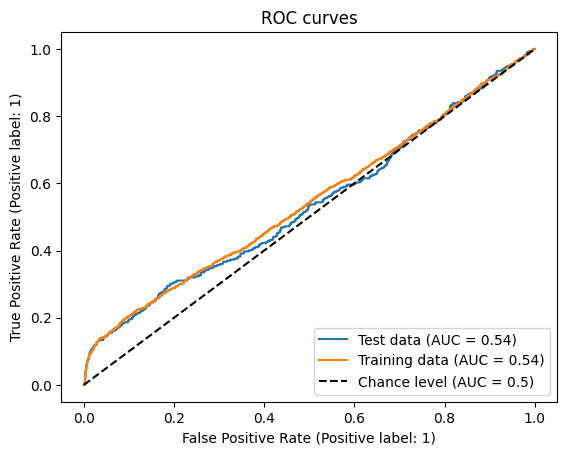

In [5]:
fig, ax = plt.subplots()
RocCurveDisplay.from_estimator(model, X_test.to_pandas(), y_test, ax=ax, name="Test data")
RocCurveDisplay.from_estimator(model, X_train.to_pandas(), y_train, ax=ax, name="Training data", plot_chance_level=True)
ax.set_title(("ROC curves"))